<a href="https://colab.research.google.com/github/MuhtasimMahadi/Muhtasim_Hossain/blob/main/Copy_of_cervical_spine_problem_detection_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [16]:
### GPU configuration

! nvidia-smi

Sat Dec  9 18:22:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |   8945MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/titl_defence/Dataset/split_dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 7452 images belonging to 3 classes.
Found 1068 images belonging to 3 classes.
Found 2130 images belonging to 3 classes.


In [8]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
VGG16.trainable = False

In [10]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40932163 (156.14 MB)
Trainable params: 262

In [12]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 20
)

Epoch 1/20
233/233 [==============================] - 1404s 6s/step - loss: 0.6372 - accuracy: 0.7744 - val_loss: 0.1627 - val_accuracy: 0.9438
Epoch 2/20
233/233 [==============================] - 204s 877ms/step - loss: 0.3015 - accuracy: 0.8794 - val_loss: 0.1332 - val_accuracy: 0.9457
Epoch 3/20
233/233 [==============================] - 205s 879ms/step - loss: 0.2453 - accuracy: 0.9035 - val_loss: 0.0995 - val_accuracy: 0.9635
Epoch 4/20
233/233 [==============================] - 203s 872ms/step - loss: 0.2245 - accuracy: 0.9109 - val_loss: 0.1351 - val_accuracy: 0.9401
Epoch 5/20
233/233 [==============================] - 207s 889ms/step - loss: 0.1947 - accuracy: 0.9226 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 6/20
233/233 [==============================] - 200s 860ms/step - loss: 0.1634 - accuracy: 0.9346 - val_loss: 0.0536 - val_accuracy: 0.9831
Epoch 7/20
233/233 [==============================] - 199s 852ms/step - loss: 0.1731 - accuracy: 0.9333 - val_loss: 0.0522 - v

In [13]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

67/67 [==============================] - 477s 7s/step - loss: 0.0193 - accuracy: 0.9944
Accuracy: 0.9943661689758301
Loss: 0.019327253103256226


In [14]:
test.class_indices

{'Common_rust': 0, 'gray_leaf_spot': 1, 'healthy': 2}

In [17]:
 import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Common_rust', 'gray_leaf_spot', 'healthy']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

67/67 [==============================] - 26s 383ms/step
                precision    recall  f1-score   support

   Common_rust       0.99      1.00      0.99       730
gray_leaf_spot       1.00      0.99      0.99       710
       healthy       1.00      1.00      1.00       690

      accuracy                           0.99      2130
     macro avg       0.99      0.99      0.99      2130
  weighted avg       0.99      0.99      0.99      2130



<Axes: >

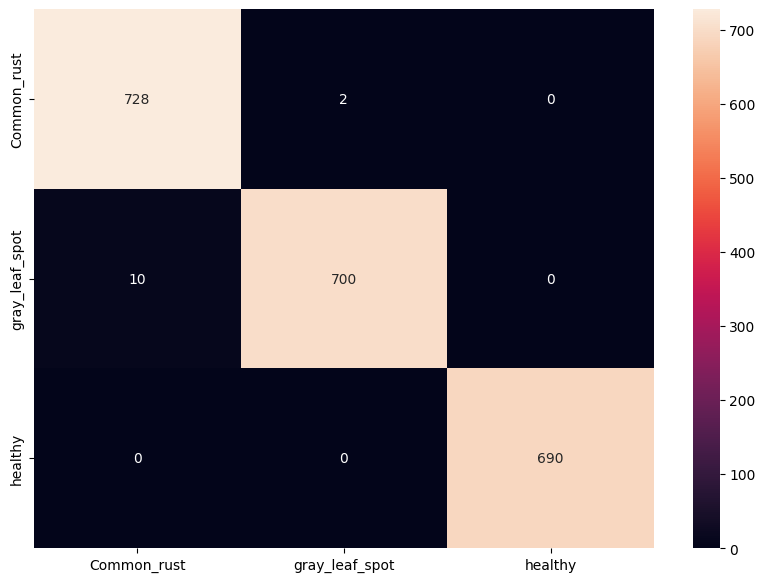

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Common_rust', 'gray_leaf_spot', 'healthy']],
                  columns = [i for i in ['Common_rust', 'gray_leaf_spot', 'healthy']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

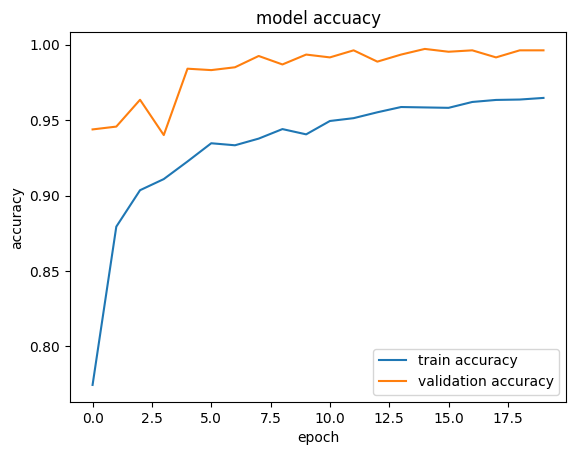

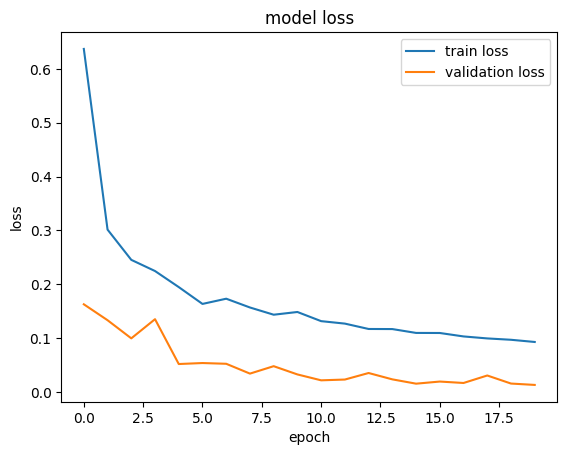

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()